# Importing Libraries

In [410]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, root_mean_squared_log_error

import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [412]:
df=pd.read_csv("C:\\Users\\niranjana\\Downloads\\train_GzS76OK\\train.csv")

In [413]:
df

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


## Definition of each columns  

id - Unique ID

week - Week No

center_id - Unique ID for fulfillment center

meal_id - Unique ID for Meal

checkout_price - Final price including discount, taxes & delivery charges

base_price - Base price of the meal

emailer_for_promotion - Emailer sent for promotion of meal

homepage_featured - Meal featured at homepage

num_orders - (Target)  Orders Count


# Understanding the Dataset

In [416]:
df.shape   #To know number of columns and columns

(456548, 9)

In [417]:
# dataset has 456548 rows and 9 columns.

In [418]:
df.columns.tolist()    #To list the columns in the dataset

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

In [419]:
df.describe()     # To get a mathematical insight

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [420]:
df.info()          #To get information non null count, dtypes from the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [421]:
df.dtypes   #To get the data type of each column

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

In [422]:
df.isnull().sum()   #Checking whether the columns have null values.

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [423]:
df.duplicated().sum()     #Checking for duplication of rows.

0

In [424]:
df.columns.duplicated().sum()   #Checking for duplication of columns.

0

In [425]:
for col in df:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")         #To get the value count of each columns.

Value counts for id:
id
1379560    1
1201644    1
1199804    1
1321877    1
1320898    1
          ..
1037219    1
1320366    1
1114006    1
1240955    1
1361984    1
Name: count, Length: 456548, dtype: int64

Value counts for week:
week
122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: count, Length: 145, dtype: int64

Value counts for center_id:
center_id
13     7046
10     7015
52     6993
43     6970
67     6915
       ... 
139    4627
57     4501
162    4366
41     4083
91     3432
Name: count, Length: 77, dtype: int64

Value counts for meal_id:
meal_id
2290    11138
1062    11137
1727    11136
1109    11134
1754    11132
2707    11123
1778    11121
1993    11116
1962    11114
1971    11102
1885    11092
2581    11072
2826    11057
2322    11002
1558    10952
1207    10806
2640    10747
1230    10746
1878    10527
2631    10458
2539    10451
1543    10236
2760    10209
1248     9939
2664     98

## Inferences

# EDA

## Univariate Analysis

In [429]:
# Univariate analysis is conducted to identify the distribution of each columns in the dataset

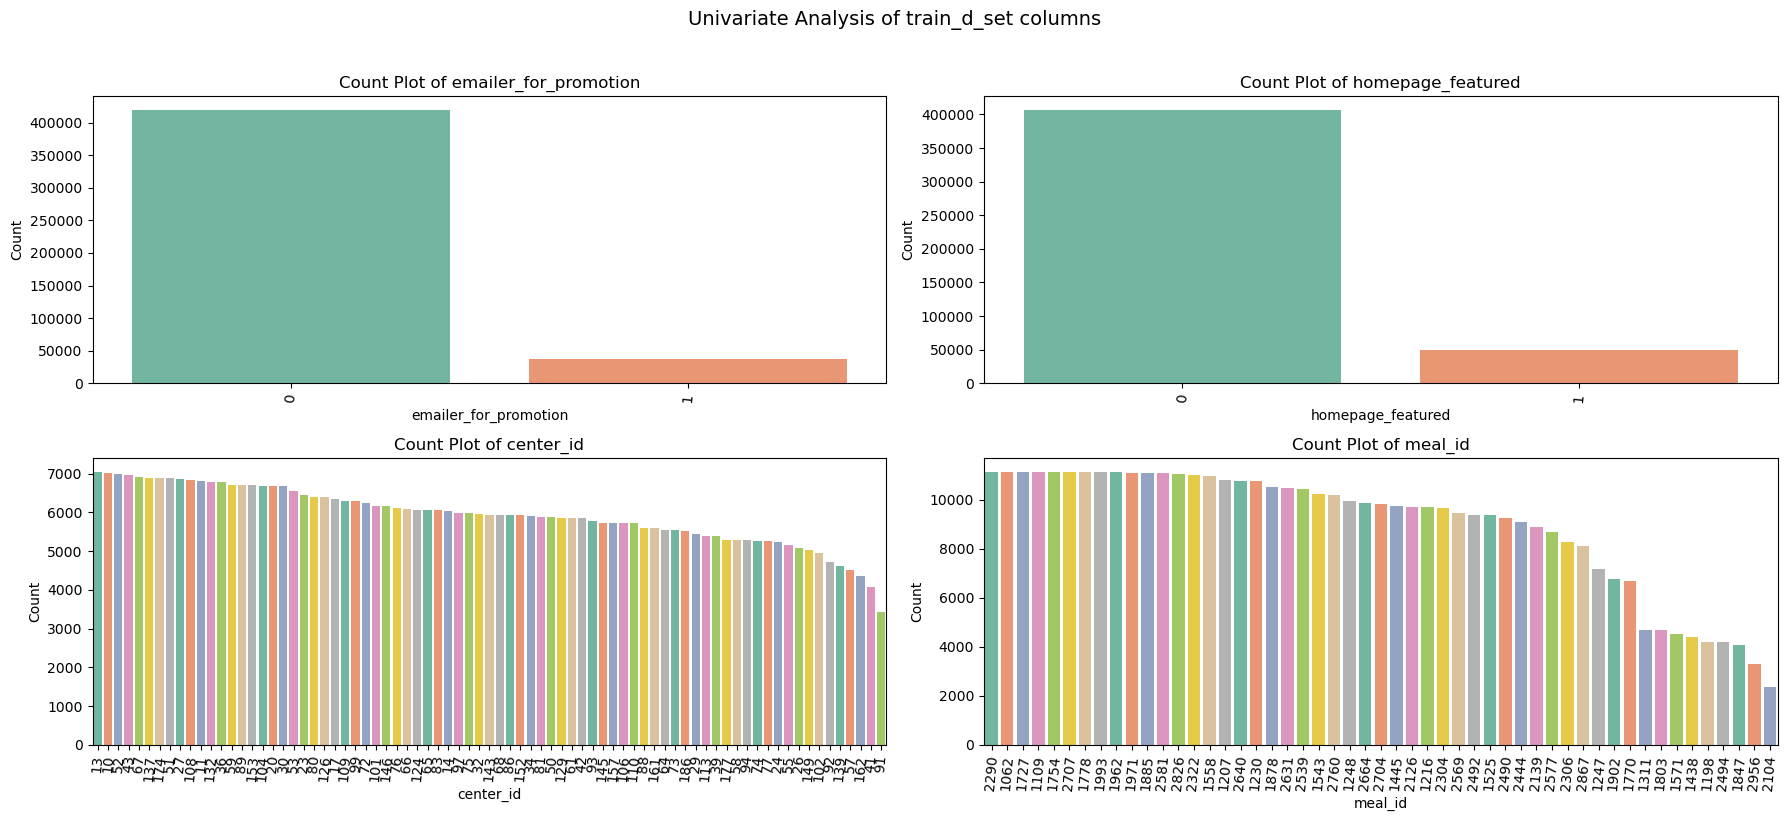

In [430]:
plot_columns = ['emailer_for_promotion','homepage_featured','center_id','meal_id'] 


rows = 2
cols = 2
total_plots = len(plot_columns)

fig, axes = plt.subplots(rows, cols, figsize=(18, 8))
axes = axes.flatten() 

# count plot
for i, column in enumerate(plot_columns):
    sns.countplot(data=df, x=column, ax=axes[i], palette='Set2', order=df[column].value_counts().index)
    axes[i].set_title(f"Count Plot of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=85) 

fig.suptitle("Univariate Analysis of train_d_set columns", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [432]:
# Bivariate analysis is conducted to compare the distribution of 2 columns

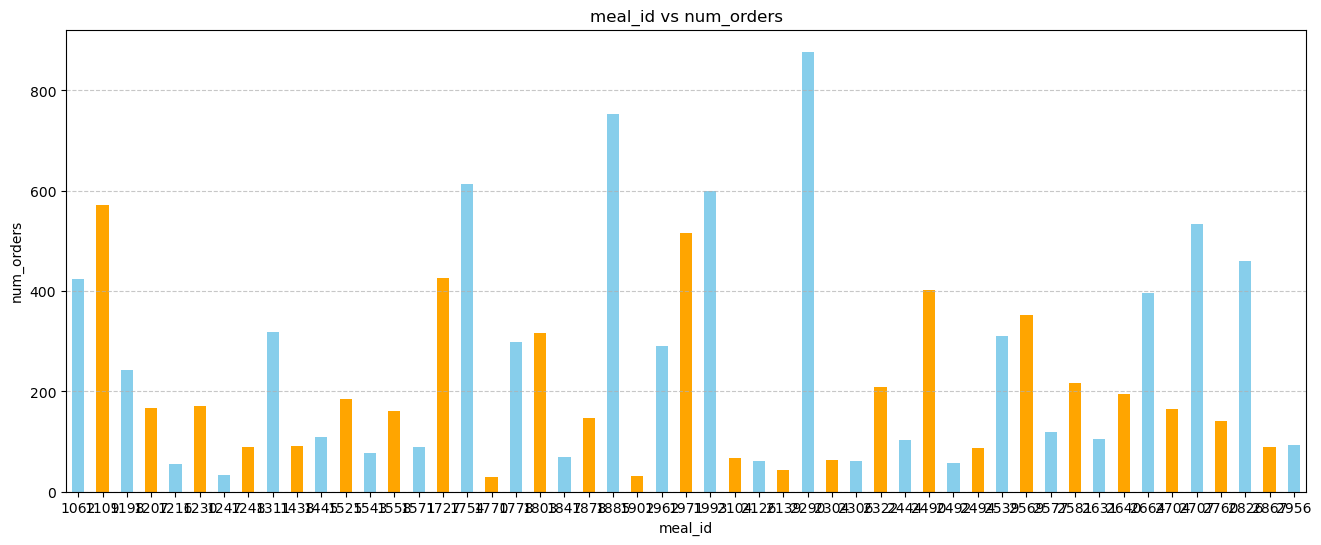

In [433]:
plt.figure(figsize=(16, 6))
salary_by_gender = df.groupby('meal_id')['num_orders'].mean()
salary_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('meal_id vs num_orders')
plt.xlabel('meal_id')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

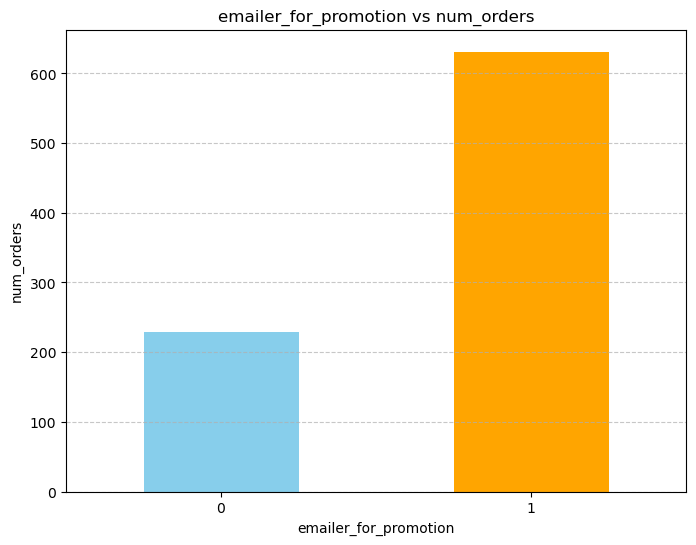

In [434]:
plt.figure(figsize=(8, 6))
salary_by_gender = df.groupby('emailer_for_promotion')['num_orders'].mean()
salary_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('emailer_for_promotion vs num_orders')
plt.xlabel('emailer_for_promotion')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

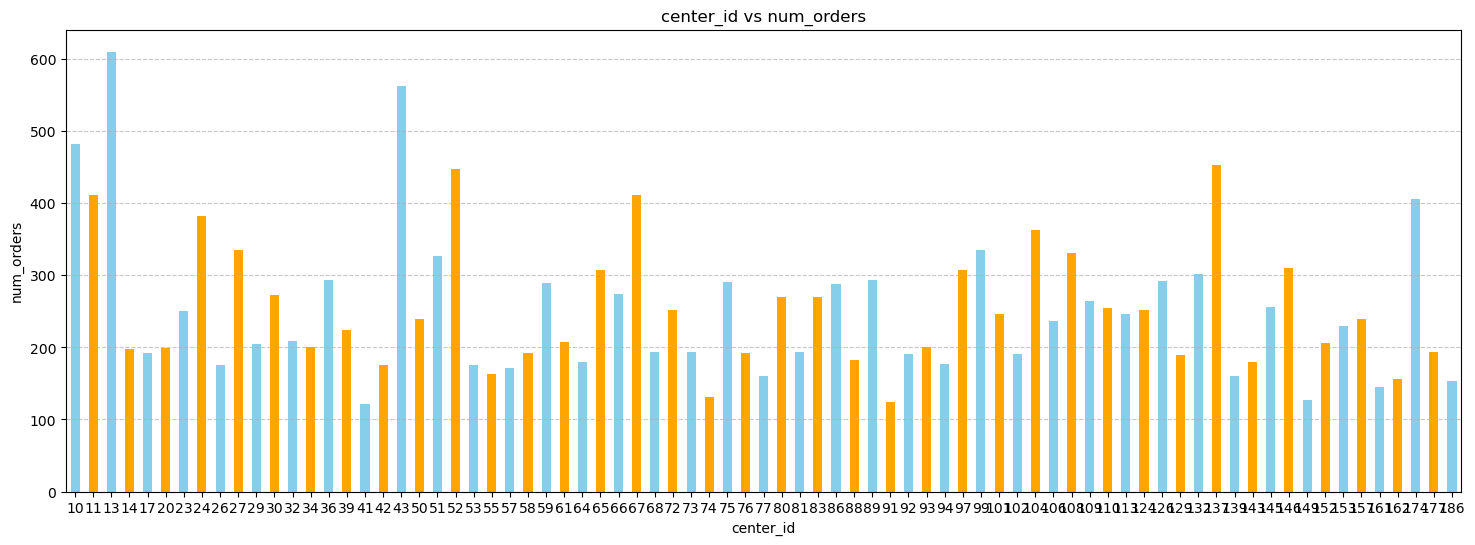

In [435]:
plt.figure(figsize=(18, 6))
salary_by_gender = df.groupby('center_id')['num_orders'].mean()
salary_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('center_id vs num_orders')
plt.xlabel('center_id')
plt.ylabel('num_orders')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Outlier detection and Handling

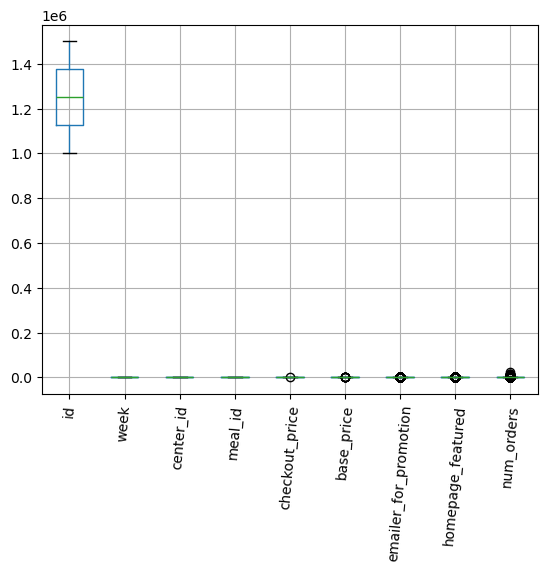

In [437]:
df.boxplot()
plt.xticks(rotation = 85)
plt.show()

In [438]:
# Copy the dataframe to df1 

In [439]:
df1=df.copy()

# Correlation Matrix

In [441]:
# Correlation matrix is taken inorder to identify the correlation of columns with each other.

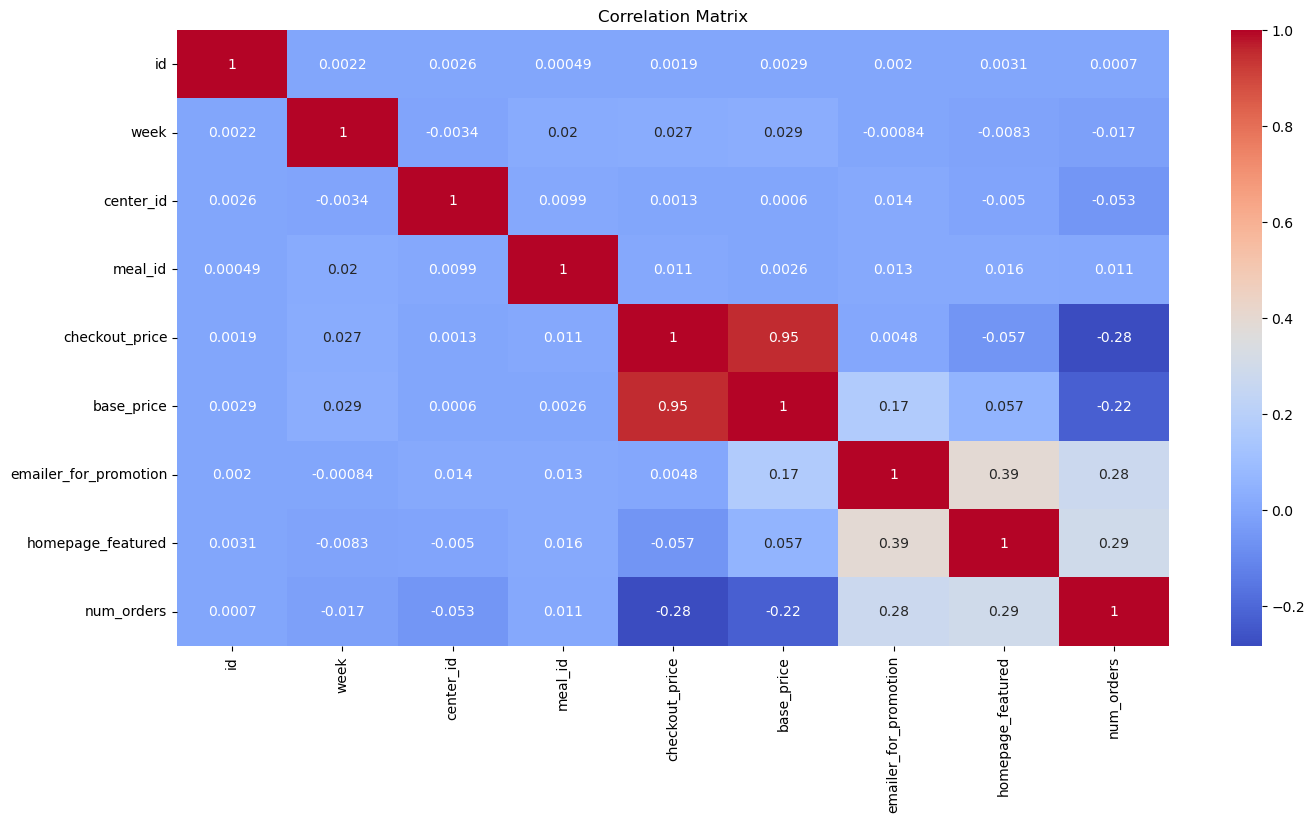

In [442]:
numerical_columns = df1.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Inferences from correlation matrix

In [444]:
df1=df1.drop(['id'], axis=1)

# Scaling 

In [446]:
# Min max scaling can be conducted to get the values in a specified range.

In [447]:
target_column = 'num_orders'   # assign target column "num_order to a variable."


numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns


numerical_columns = numerical_columns[numerical_columns != target_column]    # avoiding the target column from scaling


min_max = MinMaxScaler()
df1[numerical_columns] = min_max.fit_transform(df1[numerical_columns])

In [448]:
# Assigning x and y variables:-

In [449]:
y=df1['num_orders']
x = df1.drop('num_orders',axis = 1)

# Train_Test_Split

In [451]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=2)

# Reading the test dataset

In [453]:
ds=pd.read_csv("C:\\Users\\niranjana\\Downloads\\test_QoiMO9B.csv")

In [454]:
ds           #vds is the test dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0
...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0
32569,1039516,155,61,2304,483.09,483.09,0,0
32570,1158107,155,61,2664,322.07,323.07,0,0
32571,1444235,155,61,2569,322.07,323.07,0,0


# Understanding the dataset

In [456]:
ds.shape    # to get the number of rows and columns.

(32573, 8)

In [457]:
ds.describe()      # to get a mathematical insight of test dataset

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [458]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [459]:
ds.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

In [460]:
ds.columns.tolist()

['id',
 'week',
 'center_id',
 'meal_id',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured']

In [461]:
ds.isnull().sum()    #checking for null values

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [462]:
ds.duplicated().sum()    #Checking for duplicated rows.

0

# Inferences from test dataset

# Outlier detection and Handling

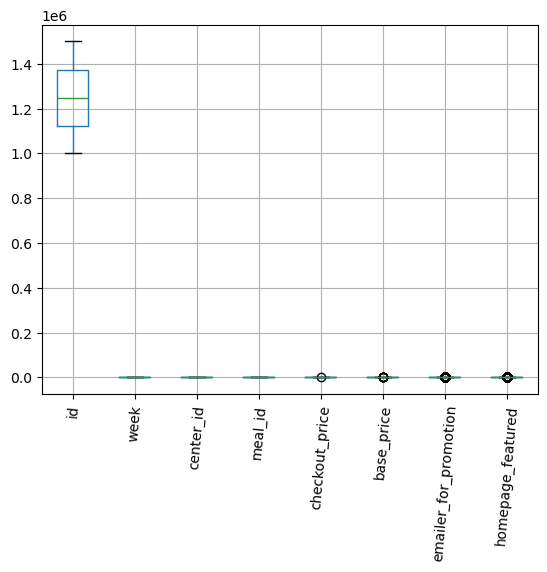

In [465]:
ds.boxplot()
plt.xticks(rotation = 85)
plt.show()

# Correlation matrix

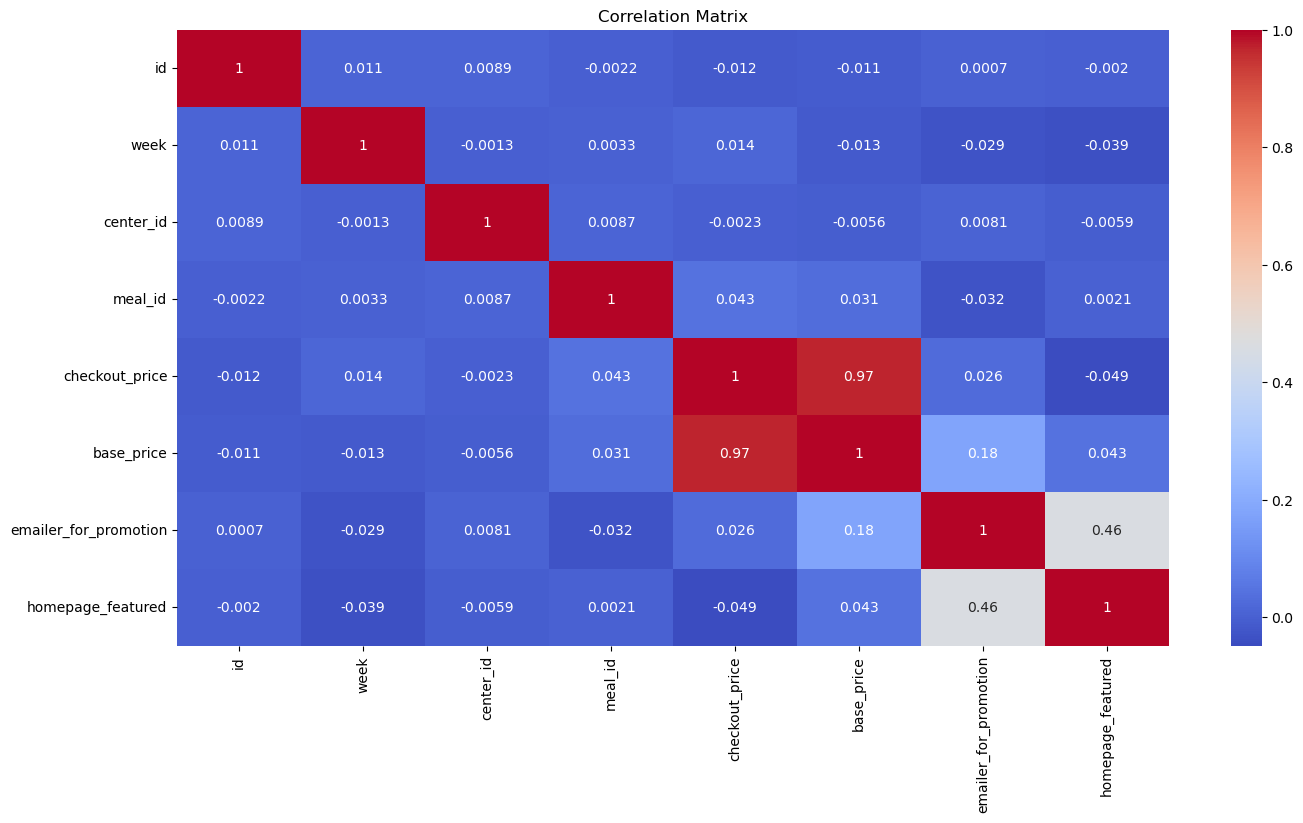

In [467]:
numerical_columns = ds.select_dtypes(include=['int64','float64'])

correlation_matrix = numerical_columns.corr()


plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [468]:
ds=ds.drop(['id'],axis=1)

# Scaling

In [470]:
target_column = 'num_orders'   # assign target column "num_order to a variable."


numerical_columns = ds.select_dtypes(include=['float64', 'int64']).columns


numerical_columns = numerical_columns[numerical_columns != target_column]    # avoiding the target column from scaling


min_max = MinMaxScaler()
ds[numerical_columns] = min_max.fit_transform(ds[numerical_columns])

In [471]:
ds

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,0.0,0.255682,0.434530,0.086266,0.068274,0.0,0.0
1,0.0,0.255682,0.491552,0.088178,0.068274,0.0,0.0
2,0.0,0.255682,0.779831,0.085338,0.068303,0.0,0.0
3,0.0,0.255682,0.828405,0.090005,0.071117,0.0,0.0
4,0.0,0.255682,0.098205,0.091831,0.072984,0.0,0.0
...,...,...,...,...,...,...,...
32568,1.0,0.289773,0.253960,0.396081,0.385829,0.0,0.0
32569,1.0,0.289773,0.655755,0.397037,0.384852,0.0,0.0
32570,1.0,0.289773,0.845829,0.243057,0.228488,0.0,0.0
32571,1.0,0.289773,0.795671,0.243057,0.228488,0.0,0.0


# Model Building:-

In [473]:
# Performing each regression models and selecting the best one:-

## Linear Regression

In [475]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

y_pred = lin_reg.predict(x_test)

print("evaluation metrics for linear regression:-\n")
mse = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:", mae_value)
print("Mean Squared Error:", mse)
print("R2 score :", r2)


evaluation metrics for linear regression:-

Mean Absolute Error: 202.7585635248618
Mean Squared Error: 126772.30551303888
R2 score : 0.19247323272620864


# Decision tree

In [477]:
dec_tree= DecisionTreeRegressor()
dec_tree.fit(x,y)
y_pred = dec_tree.predict(x_test)

print("evaluation metrics for Decision Tree:-\n")
mse = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)

print("Mean Absolute Error:", mae_value)
print("Mean Squared Error:", mse)
print("R2 score :", r2)


evaluation metrics for Decision Tree:-

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R2 score : 1.0


# Random Forest

In [479]:
rf_model = RandomForestRegressor()


rf_model.fit(x_train, y_train)


y_pred = rf_model.predict(x_test)


mse = mean_squared_error(y_test, y_pred)
mae_value = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
RMSLE= root_mean_squared_log_error(y_test,y_pred)
print("Mean Absolute Error:", mae_value)
print("Mean Squared Error:", mse)
print("R2 score :", r2)
print("Rmsle score :", root_mean_squared_log_error)

Mean Absolute Error: 76.50853378600372
Mean Squared Error: 32383.57156074252
R2 score : 0.7937199236899874
Rmsle score : <function root_mean_squared_log_error at 0x0000020FBCEA1940>


In [480]:
rf_model = RandomForestRegressor()

rf_model.fit(x_train, y_train)

y_pred1 = rf_model.predict(ds)

In [481]:
ds1=pd.read_csv("C:\\Users\\niranjana\\Downloads\\train_GzS76OK\\train.csv")

In [485]:
submit=pd.DataFrame({'id':ds['id'],
                    'num_orders': y_pred1})

KeyError: 'id'

In [ ]:
submit

In [ ]:
submit.to_csv("C:\\Users\\niranjana\\Downloads\\submission.csv", index=False)